<a href="https://colab.research.google.com/github/piabona/ML-DL/blob/main/ML_02_%EC%95%84%EB%8B%AC%EB%A6%B0_%EB%B6%84%EB%A5%98_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_(ex_%EB%B6%93%EA%BD%83).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 퍼셉트론 vs 아달린의 차이

- 퍼셉트론(Perceptron)과 아달린(Adaline)은 둘 다 이진 분류 문제를 해결하기 위한 선형 분류 알고리즘이나 몇가지 차이 있음
- 1. 활성화 함수의 차이:
    - 퍼셉트론: **계단 함수(Step Function)를 활성화 함수로** 사용합니다. 퍼셉트론은 입력 값과 가중치의 합이 임계치(threshold)보다 크면 1을 출력하고, 그렇지 않으면 -1을 출력합니다.
    - 아달린: **선형 활성화 함수**를 사용합니다. 아달린은 입력 값과 가중치의 합을 그대로 출력합니다.

- 2. 학습 알고리즘의 차이:
    - 퍼셉트론: 미분 가능한 활성화 함수를 사용하지 않으므로 퍼셉트론은 **Perceptron Learning Algorithm을 사용**하여 학습합니다. 이는 잘못 분류된 샘플에 대해 **가중치를 조정**하는 단순한 규칙을 따릅니다.
    - 아달린: 비용 함수를 정의하고, 이 비용 함수를 최소화하기 위해** 경사 하강법(Gradient Descent)**을 사용하여 가중치를 업데이트합니다. 아달린은 연속적인 값을 예측하므로 회귀 문제에도 사용할 수 있습니다.
- 3. 수렴 속도와 성능:
    - 아달린: 퍼셉트론보다 더 **빠른 수렴** 속도를 가질 수 있습니다. 특히 비용 함수가 미분 가능하고 연속적이기 때문에 **경사 하강법을 사용**하여 보다 정확한 가중치 업데이트를 수행할 수 있습니다.

- **퍼셉트론은 단층 퍼셉트론(Single-Layer Perceptron)**이며, 선형적으로 분리 가능한 데이터셋에서만 수렴이 보장됩니다. 반면에 **아달린은 다층 퍼셉트론(Multi-Layer Perceptron)**의 한 종류로 볼 수 있으며, 선형적으로 분리 가능하지 않은 데이터셋에 대해서도 학습이 가능합니다. 아달린은 입력 특성에 대한 가중치를 조정하여 입력과 출력 사이의 선형 관계를 학습합니다.

In [7]:
import os
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

# setosa와 versicolor를 선택합니다
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# 꽃받침 길이와 꽃잎 길이를 추출합니다
X = df.iloc[0:100, [0, 2]].values

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


## 아달린 알고리즘 구현하기

In [5]:
class AdalineGD(object):
    """적응형 선형 뉴런 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      에포크마다 누적된 비용 함수의 제곱합

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : array-like, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # 이 코드의 활성화 함수는 항등 함수(identity function)이기 때문에
            # 아무런 효과가 없습니다.
            # 이 대신 `output = self.net_input(X)`로 바로 쓸 수 있습니다.
            # 이 활성화 함수는 개념적인 목적을 위해 만들었습니다.
            # (잠시 후에 보게 될) 로지스틱 회귀의 경우 이 함수를 시그모이드 함수로
            # 바꾸어 로지스틱 회귀 분류기를 구현합니다.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """선형 활성화 계산"""
        return X

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

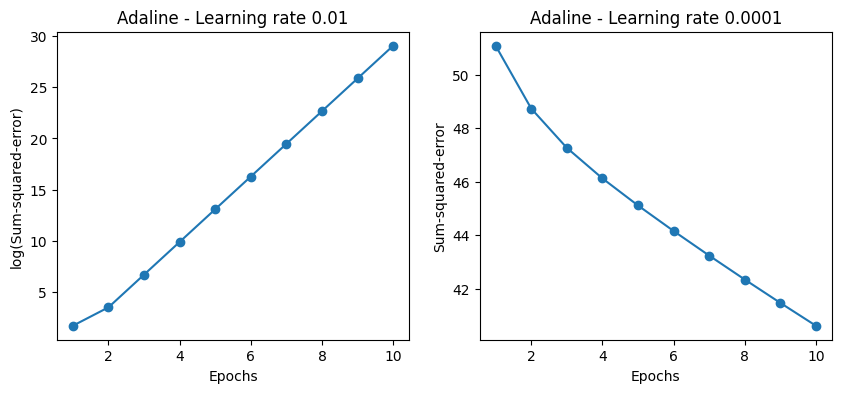

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

## 경사하강법이란?

- **경사 하강법(Gradient Descent)**은 함수의 최솟값을 찾는 최적화 알고리즘 중 하나입니다. 주어진 함수의 기울기(경사)를 이용하여 함수의 최솟값을 찾아가는 방법입니다.
- 경사 하강법은 다음과 같은 원칙에 기반하고 있습니다:

 - 1. 현재 위치에서의 기울기(경사)를 계산합니다.
 - 2. 기울기가 0이 될 때까지 조금씩 이동합니다.
 - 3. 기울기가 0인 지점에서 멈춥니다.

- 경사 하강법은 다음과 같은 수식을 사용하여 기울기를 계산하고, 함수의 최솟값을 찾습니다:

    - **새로운 위치=현재 위치−(학습률×기울기)**

- 여기서 **학습률(learning rate)**은 사용자가 정의해야 하는 하이퍼파라미터로, 한 번의 반복에서 얼마나 멀리 이동할지를 결정합니다. 학습률이 너무 작으면 수렴이 느려질 수 있고, 너무 크면 최솟값을 지나칠 수 있습니다.

- 경사 하강법은 여러 종류의 함수에서 사용할 수 있으며, 머신러닝에서는 주로 비용 함수(Cost Function) 또는 **손실 함수(Loss Function)의 최솟값을 찾기 위해** 사용됩니다. 이 함수는 모델의 예측값과 실제값 사이의 차이를 측정하고, 이 차이를 최소화하여 모델을 학습시킵니다.

- 경사 하강법은 *단순 경사 하강법(Simple Gradient Descent), 확률적 경사 하강법(Stochastic Gradient Descent), 미니 배치 경사 하강법(Mini-Batch Gradient Descent) *등 여러 변형이 있습니다. 이들은 데이터셋의 크기에 따라 데이터를 어떻게 활용할지에 대한 방법의 차이입니다.

In [11]:
from IPython.display import Image
Image(url='https://git.io/JtIb4', width=700)

## 경사 하강법 종류

1. **배치 경사 하강법 (Batch Gradient Descent)**:
    - 전체 데이터셋을 사용: 학습을 위해 전체 훈련 데이터셋을 사용합니다.
    - 업데이트 빈도: 한 번의 에포크(전체 데이터셋에 대한 한 번의 순회)마다 가중치를 업데이트합니다.
    - 장점: 글로벌 미니멈(global minimum)을 찾을 수 있습니다.
    - 단점: 메모리를 많이 차지하며, 큰 데이터셋에서 느릴 수 있습니다.

2. **확률적 경사 하강법 (Stochastic Gradient Descent)**:
    - 단일 데이터 포인트 사용: 각 훈련 데이터 포인트에 대해 가중치를 업데이트합니다.
    - 업데이트 빈도: 매 데이터 포인트마다 가중치를 업데이트하므로 업데이트가 빈번하게 일어납니다.
    - 장점: 빠르게 수렴하며, 큰 데이터셋에 대해 메모리를 적게 사용합니다.
    - 단점: 지역 미니멈(local minimum)에 수렴할 가능성이 있습니다.

3. **미니 배치 경사 하강법 (Mini-Batch Gradient Descent)**:
    - 미니 배치 사용: 특정 크기의 미니 배치(일정한 데이터 포인트의 부분집합)를 사용하여 가중치를 업데이트합니다.
    - 업데이트 빈도: 미니 배치마다 가중치를 업데이트하므로 업데이트 빈도는 확률적 경사 하강법과 배치 경사 하강법의 중간입니다.
    - 장점: 병렬 처리가 가능하며, 빠른 수렴과 메모리 효율성을 제공합니다.
    - 단점: 지역 미니멈에 수렴할 가능성이 있지만, 일반적으로 덜 민감합니다.

### 배치 경사하강법 (+표준화)
- 표준화를 통해 배치 경사하강법 결과를 향상함

In [12]:
# 특성을 표준화합니다.
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [14]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 설정합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # 꽃받침 길이 최소/최대
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # 꽃잎 길이 최소/최대
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor=None if idx==1 else 'black')

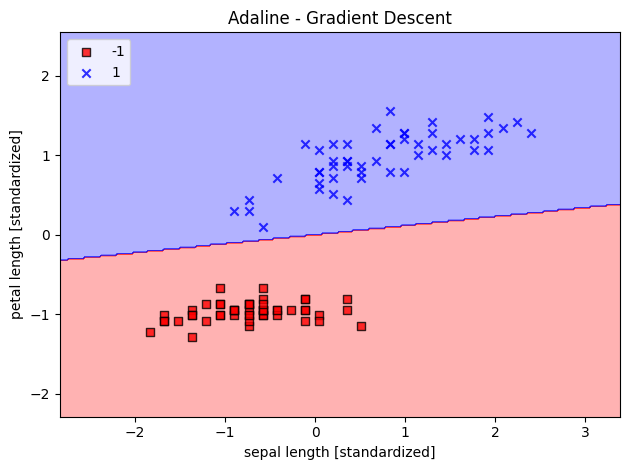

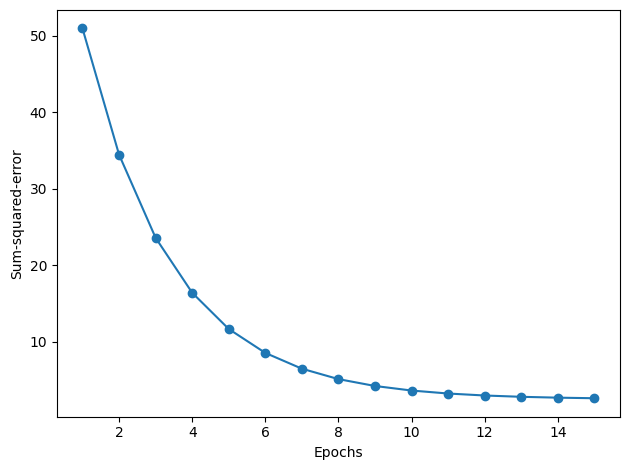

In [15]:
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

### 확률적 경사 하강법

In [16]:
class AdalineSGD(object):
    """ADAptive LInear NEuron 분류기

    Parameters
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    shuffle : bool (default: True)
      True로 설정하면 같은 반복이 되지 않도록 에포크마다 훈련 데이터를 섞습니다
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    Attributes
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      모든 훈련 샘플에 대해 에포크마다 누적된 평균 비용 함수의 제곱합

    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃 벡터

        반환값
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """가중치를 다시 초기화하지 않고 훈련 데이터를 학습합니다"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """훈련 데이터를 섞습니다"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """랜덤한 작은 수로 가중치를 초기화합니다"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """아달린 학습 규칙을 적용하여 가중치를 업데이트합니다"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        """입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """선형 활성화 계산"""
        return X

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

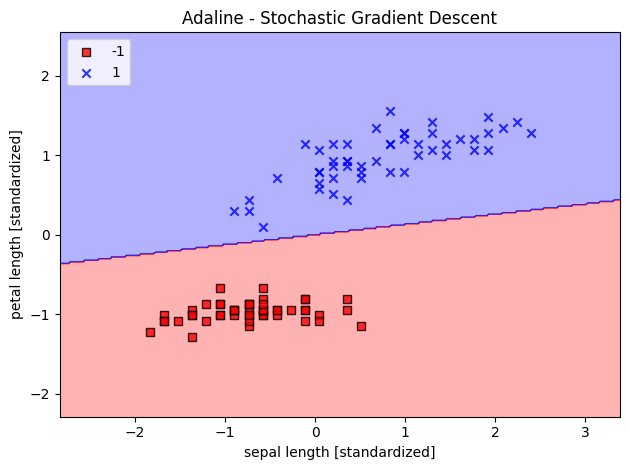

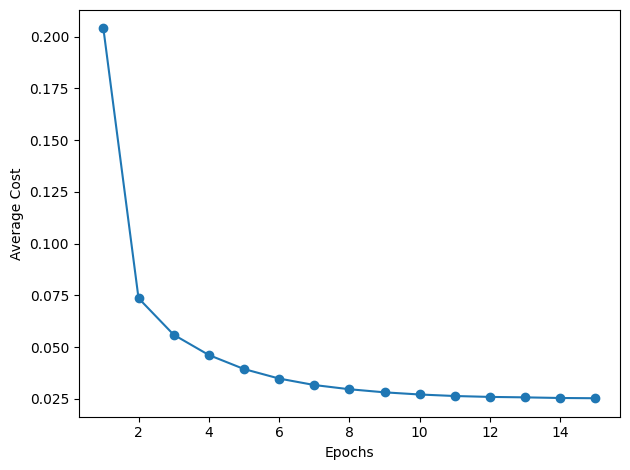

In [17]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()